<a href="https://colab.research.google.com/github/sloba2004/firsttrade/blob/main/Yahoo_Finance_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
site = "https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1630281600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
response = requests.get(site, headers={'User-agent': 'Mozilla/5.0'})

In [2]:
import requests

In [11]:
response.text

'{"chart":{"result":[{"meta":{"currency":"TWD","symbol":"2330.TW","exchangeName":"TAI","instrumentType":"EQUITY","firstTradeDate":946947600,"regularMarketTime":1630301403,"gmtoffset":28800,"timezone":"CST","exchangeTimezoneName":"Asia/Taipei","regularMarketPrice":605.0,"chartPreviousClose":69.649,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"CST","end":1630285200,"start":1630285200,"gmtoffset":28800},"regular":{"timezone":"CST","end":1630301400,"start":1630285200,"gmtoffset":28800},"post":{"timezone":"CST","end":1630301400,"start":1630301400,"gmtoffset":28800}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[946947600,947034000,947120400,947206800,947466000,947552400,947638800,947725200,947811600,948070800,948157200,948243600,948330000,948416400,948675600,948762000,948848400,948934800,949021200,949280400,949366800,949453200,949539600,949626000,949885200,949971600,950058000,950144400,950230800,950490

In [12]:
import json
import numpy as np
import pandas as pd

data = json.loads(response.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
df.head()

,close,open,volume,high,low
2000-01-04 01:00:00,69.649033,69.649033,2.006623e+11,69.649033,68.475182
2000-01-05 01:00:00,71.214043,69.649033,4.024668e+11,71.214043,68.866341
2000-01-06 01:00:00,69.649033,70.822884,1.975457e+11,71.214043,69.649033
2000-01-07 01:00:00,67.692490,67.301331,2.352703e+11,68.475182,66.518639
2000-01-10 01:00:00,70.040192,69.649033,2.761717e+11,70.431351,68.475182


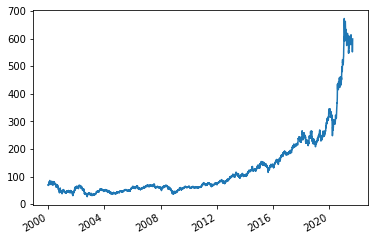

In [13]:
df.close.plot()